In [1]:
from CATH_disorder import *
%matplotlib inline

In [2]:
df = pd.read_csv('./compiled.tsv', sep='\t', index_col=0)
sfam = pd.read_csv('./sfam_compiled.tsv', sep='\t', index_col=0)

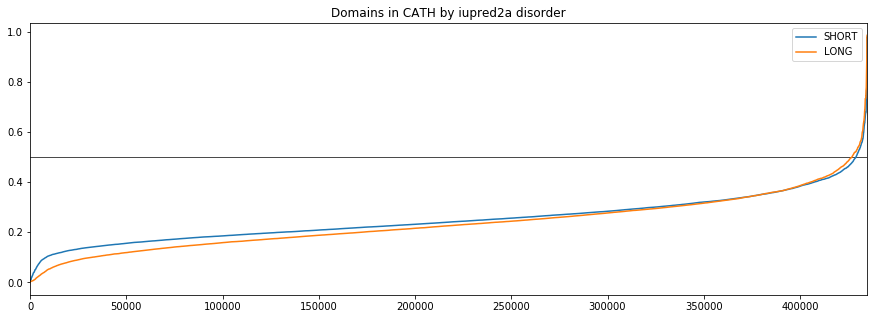

In [3]:
plot_distr(df.SHORT, df.LONG, 
           savedname='./figs/all_domains.png', 
           title='Domains in CATH by iupred2a disorder',
          legend=True)

In [4]:
print("Method used - LONG")
print("Proportion of superfamilies with disorder over 0.5")
print(round(len(sfam.LONG[sfam.LONG>0.5])/len(sfam.LONG)*100,3))
print("Proportion of domains with disorder over 0.5")
print(round(len(df.LONG[df.LONG > 0.5])/len(df)*100, 3))

Method used - LONG
Proportion of superfamilies with disorder over 0.5
3.072
Proportion of domains with disorder over 0.5
1.81


In [5]:
print("Method used - SHORT")
print("Proportion of superfamilies with disorder over 0.5")
print(round(len(sfam.SHORT[sfam.SHORT>0.5])/len(sfam.SHORT)*100,3))
print("Proportion of domains with disorder over 0.5")
print(round(len(df.SHORT[df.SHORT > 0.5])/len(df)*100, 3))

Method used - SHORT
Proportion of superfamilies with disorder over 0.5
3.154
Proportion of domains with disorder over 0.5
1.328


In [6]:
print('Correlation between method difference and domain length = ', end='')
print(round(sfam.DIFF.corr(sfam.LEN), 3))

Correlation between method difference and domain length = -0.424
